# 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.max_columns = None

# 2.Reading and understanding data

In [2]:
data = pd.read_csv("Leads.csv")

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
data.duplicated().sum()

0

Observations:
1.The data set has a total of 9240 rows and 37 columns
2. The target variable is the column - Converted
3. The columns - Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Tags, Lead Quality, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score have high percentages of missing values which should be treated.
4. There are no duplicate datas availabe
5. Prospect ID and Lead Number both serve the same purpose. They are both unique identifiers. We will drop Prospect ID
6. Few columns have "Select" in their entries which should be changed to null


# 3. Data Preparation

3.1 Renaming the columns

In [9]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [11]:
data.rename(columns={'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview' }, inplace=True)
data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'last_activity', 'country',
       'specialization', 'source', 'occupation', 'course_selection_reason',
       'search', 'magazine', 'newspaper_article', 'x_education_forums',
       'newspaper', 'digital_advertisement', 'through_recommendations',
       'courses_updates', 'tags', 'lead_quality',
       'supply_chain_content_updates', 'dm_content_updates', 'lead_profile',
       'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score',
       'cheque_payment', 'mastering_interview', 'last_notable_activity'],
      dtype='object')

3.2 Dealing with 'select'

In [12]:
data=data.replace('Select', np.NaN)

In [13]:
round(100*(data.isna().sum()/len(data.index)),2)

prospect_id                      0.00
lead_number                      0.00
lead_origin                      0.00
lead_source                      0.39
do_not_email                     0.00
do_not_call                      0.00
converted                        0.00
total_visits                     1.48
time_on_website                  0.00
page_views_per_visit             1.48
last_activity                    1.11
country                         26.63
specialization                  36.58
source                          78.46
occupation                      29.11
course_selection_reason         29.32
search                           0.00
magazine                         0.00
newspaper_article                0.00
x_education_forums               0.00
newspaper                        0.00
digital_advertisement            0.00
through_recommendations          0.00
courses_updates                  0.00
tags                            36.29
lead_quality                    51.59
supply_chain

Observation:
    there is a huge change in the percentage of null values after replacing columns containing select with Null 

In [14]:
#dropping prospect_id and lead_number as they are unique id's representing each row and does not add value to our analysis
data.drop(['prospect_id','lead_number'], axis=1, inplace=True)

3.3 Dealing with Null values

The columns source, lead_quality, lead_profile, asymmetrique_activity_index, asymmetrique_profile_index, asymmetrique_activity_score, asymmetrique_profile_score have null values more than 40% 

In [15]:
data.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score'], 
        axis = 1, inplace = True)

(round(100*(data.isna().sum()/len(data.index)),2))

lead_origin                      0.00
lead_source                      0.39
do_not_email                     0.00
do_not_call                      0.00
converted                        0.00
total_visits                     1.48
time_on_website                  0.00
page_views_per_visit             1.48
last_activity                    1.11
country                         26.63
specialization                  36.58
occupation                      29.11
course_selection_reason         29.32
search                           0.00
magazine                         0.00
newspaper_article                0.00
x_education_forums               0.00
newspaper                        0.00
digital_advertisement            0.00
through_recommendations          0.00
courses_updates                  0.00
tags                            36.29
supply_chain_content_updates     0.00
dm_content_updates               0.00
city                            39.71
cheque_payment                   0.00
mastering_in

In [16]:
#dealing with other columns having null values
#lead_source 
data['lead_source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: lead_source, dtype: object

In [17]:
data['lead_source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [22]:
data['lead_source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Others               203
Welingak Website     142
Name: lead_source, dtype: int64

In [23]:
#replacing null values with Google and replacing google with Google
#replacing categories with low counts as others
data['lead_source']=data['lead_source'].replace([np.NaN, 'google'], 'Google')
data['lead_source']=data['lead_source'].replace(['Referral Sites','Facebook', 'bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone',
                                                'Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Others')

In [24]:
data['lead_source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Others               203
Welingak Website     142
Name: lead_source, dtype: int64

In [25]:
#total_visits
data['total_visits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: total_visits, dtype: float64

In [26]:
# Replacing Null Values in 'TotalVisits' with median
data['total_visits'] = data['total_visits'].replace(np.nan, data['total_visits'].median())

In [27]:
#page_views_per_visit
data['page_views_per_visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [28]:
# Replacing Null Values in 'page_views_per_visit' with median
data['page_views_per_visit'] = data['page_views_per_visit'].replace(np.nan, data['page_views_per_visit'].median())

In [29]:
#last_activity
data.last_activity.value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: last_activity, dtype: int64

In [30]:
# Replacing the NA values and others with low count as Others
data['last_activity'] = data['last_activity'].replace(np.nan, 'Email Opened')
data['last_activity'] = data['last_activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Marked Spam', 'Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable'],
                                                        'Others')

In [31]:
# country
data['country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [32]:
# Dropping Country column since, more than 90% values are India or NA
data.drop('country', axis=1, inplace=True)

In [33]:
#specialization
data.specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: specialization, dtype: int64

In [34]:
data['specialization'] = data['specialization'].replace(np.nan, 'Not Specified')
# Grouping values with low count in order to remove bias
# Management Specialization
data['specialization'] = data['specialization'].replace(['Finance Management', 'Human Resource Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')
# Business Specialization
data['specialization'] = data['specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')

In [35]:
#occupation
data.occupation.value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: occupation, dtype: int64

In [36]:
data['occupation'] = data['occupation'].replace(np.nan, 'Not Specified')
data['occupation'] = data['occupation'].replace(['Housewife', 'Businessman'],'Other')

In [37]:
#course_selection_reason
data.course_selection_reason.value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: course_selection_reason, dtype: int64

In [38]:
#dropping the colum course_selection_reason as most of its data is null and the other major part is better career prospects
data.drop('course_selection_reason', axis=1, inplace=True)

In [39]:
#tags
data.tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [40]:
# Grouping values with low count
data['tags'] = data['tags'].replace(np.nan, 'Not Specified')
data['tags'] = data['tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [41]:
#city
data.city.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

In [42]:
# Dropping the City column as most entries are Mumbai or not known
data.drop('city', axis=1,inplace=True)

In [43]:
(round(100*(data.isna().sum()/len(data.index)),2))

lead_origin                     0.0
lead_source                     0.0
do_not_email                    0.0
do_not_call                     0.0
converted                       0.0
total_visits                    0.0
time_on_website                 0.0
page_views_per_visit            0.0
last_activity                   0.0
specialization                  0.0
occupation                      0.0
search                          0.0
magazine                        0.0
newspaper_article               0.0
x_education_forums              0.0
newspaper                       0.0
digital_advertisement           0.0
through_recommendations         0.0
courses_updates                 0.0
tags                            0.0
supply_chain_content_updates    0.0
dm_content_updates              0.0
cheque_payment                  0.0
mastering_interview             0.0
last_notable_activity           0.0
dtype: float64

3.4 checking the other variables

In [44]:
#do_not_calll                  
data.do_not_call.value_counts()

No     9238
Yes       2
Name: do_not_call, dtype: int64

In [45]:
data.search.value_counts()

No     9226
Yes      14
Name: search, dtype: int64

In [46]:
data.magazine.value_counts()

No    9240
Name: magazine, dtype: int64

In [47]:
data.newspaper_article.value_counts()

No     9238
Yes       2
Name: newspaper_article, dtype: int64

In [48]:
data.x_education_forums.value_counts()

No     9239
Yes       1
Name: x_education_forums, dtype: int64

In [49]:
data.newspaper.value_counts()

No     9239
Yes       1
Name: newspaper, dtype: int64

In [50]:
data.digital_advertisement.value_counts()

No     9236
Yes       4
Name: digital_advertisement, dtype: int64

In [51]:
data.through_recommendations.value_counts()

No     9233
Yes       7
Name: through_recommendations, dtype: int64

In [52]:
data.courses_updates.value_counts()

No    9240
Name: courses_updates, dtype: int64

In [53]:
data.supply_chain_content_updates.value_counts()

No    9240
Name: supply_chain_content_updates, dtype: int64

In [54]:
data.dm_content_updates.value_counts()

No    9240
Name: dm_content_updates, dtype: int64

In [55]:
data.cheque_payment.value_counts()

No    9240
Name: cheque_payment, dtype: int64

In [56]:
drop_cln=['do_not_call','search','magazine','newspaper_article','x_education_forums','newspaper','digital_advertisement',
         'through_recommendations','courses_updates', 'supply_chain_content_updates','dm_content_updates','cheque_payment']

In [57]:
data.drop(drop_cln,axis=1, inplace=True)

In [58]:
data.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'total_visits', 'time_on_website', 'page_views_per_visit',
       'last_activity', 'specialization', 'occupation', 'tags',
       'mastering_interview', 'last_notable_activity'],
      dtype='object')

3.5 dealing with outliers

In [59]:
data.describe()

,converted,total_visits,time_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


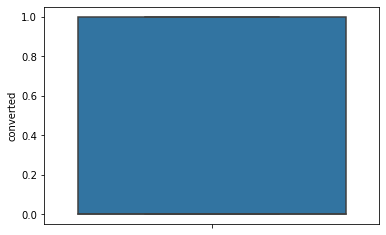

In [60]:
#converted
sns.boxplot(y=data.converted)
plt.show()

In [61]:
data.converted.describe()

count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: converted, dtype: float64

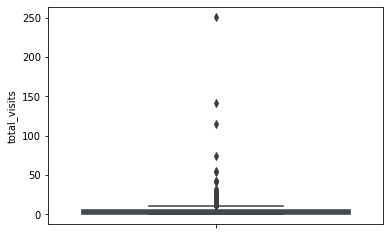

In [62]:
#total_visits
sns.boxplot(y=data.total_visits)
plt.show()

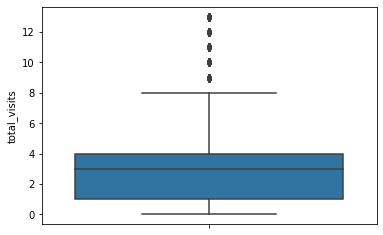

In [63]:
# Removing the top 1% of the value to handle outliers
data = data[(data['total_visits'] <= data['total_visits'].quantile(0.98))]
sns.boxplot(y = data['total_visits'])
plt.show()

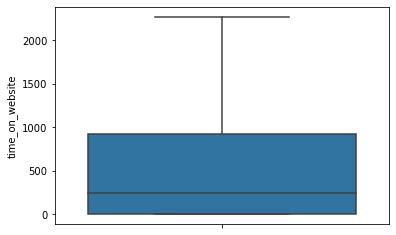

In [64]:
#time_on_website
sns.boxplot(y=data.time_on_website)
plt.show()

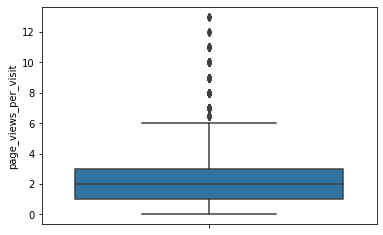

In [65]:
#page_views_per_visit
sns.boxplot(y=data.page_views_per_visit)
plt.show()

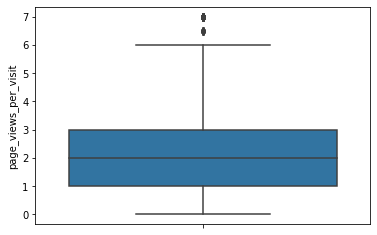

In [66]:
# Removing the top 1% of the value to handle outliers
data = data[(data['page_views_per_visit'] <= data['page_views_per_visit'].quantile(0.98))]
sns.boxplot(y = data['page_views_per_visit'])
plt.show()

# 4. Univariate analysis

In [67]:
data.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,mastering_interview,last_notable_activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


In [68]:
# changing the columns 'do_not_email' and 'mastering_interview' having yes/no to 1/0
def data_map(x):
    return x.map({'Yes': 1, 'No':0})

temp_list = ['do_not_email', 'mastering_interview']

# Applying the above custom function

data[temp_list] = data[temp_list].apply(data_map)

In [69]:
data.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,tags,mastering_interview,last_notable_activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


4.1 categorical values

In [70]:
#function for plotting the columns
def univar_analysis(col):
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x = col, hue = data.converted, data=data)
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
    plt.xticks(rotation = 90)
    plt.show()

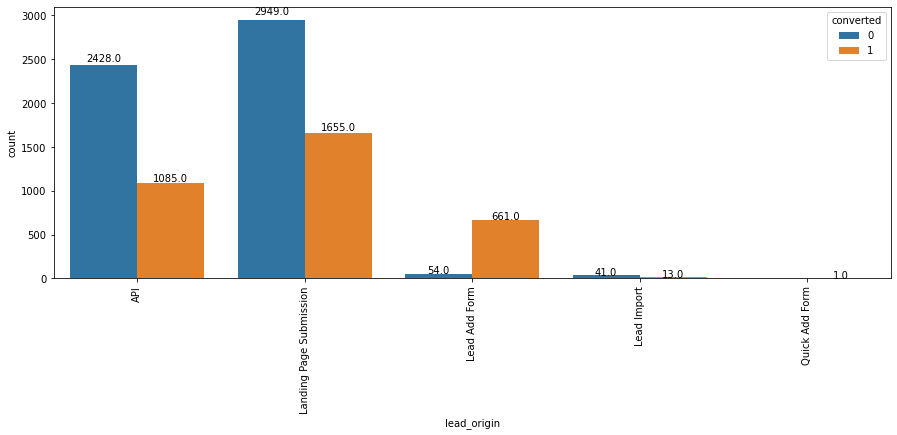

In [71]:
#lead_origin
univar_analysis('lead_origin')

observation:
    Customers identified via Lead Add Form have a high conversion


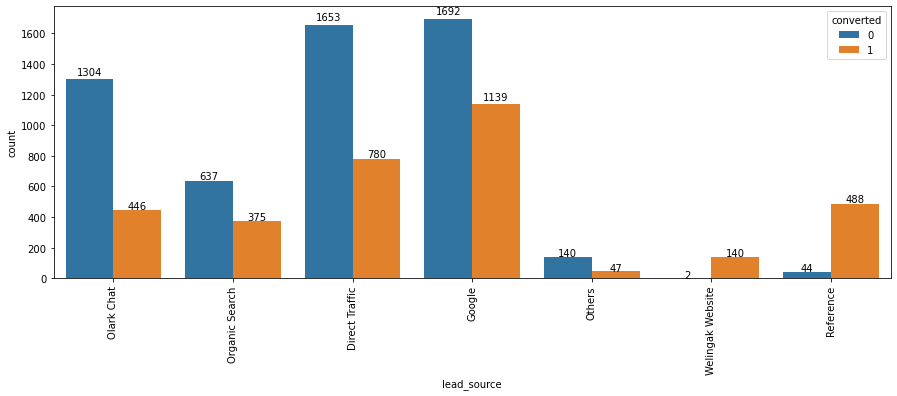

In [72]:
#lead_source
univar_analysis('lead_source')

`observation:`
1. Source of Lead via Google and Direct Traffic have high negative conversion as compared to others.
2. Leads coming via Reference have the highest conversion rate.


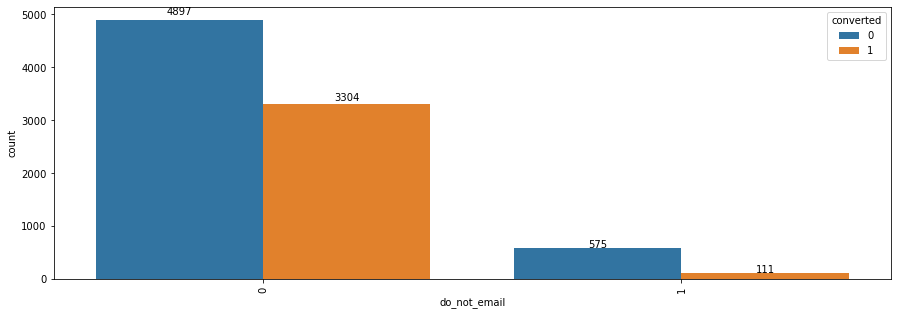

In [73]:
#do_not_email
univar_analysis('do_not_email')

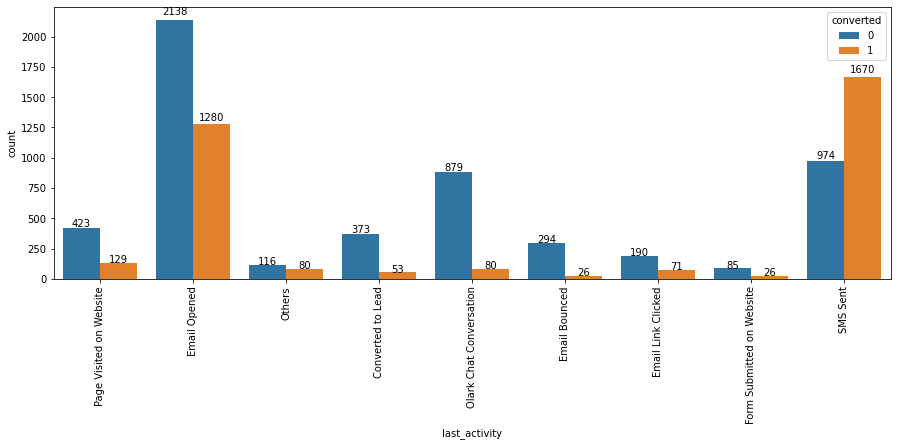

In [75]:
#last_activity
univar_analysis('last_activity')

`observation:`
1. Last Activity performed by Customers is SMS sent, then it has conversion of 1727.


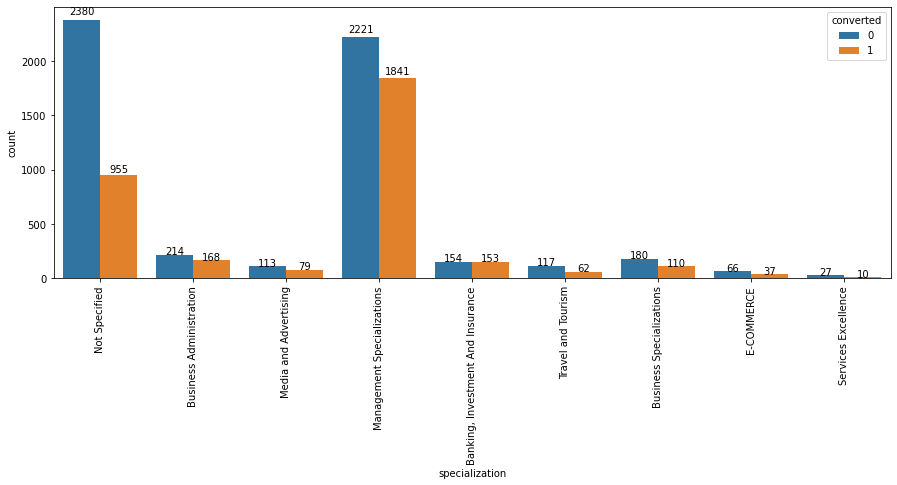

In [76]:
#specialization
univar_analysis('specialization')

`Observation:`
1. Customers who worked in Management Specialization have conversion of 1922.
2. Customers who worked in Service have the least conversion.

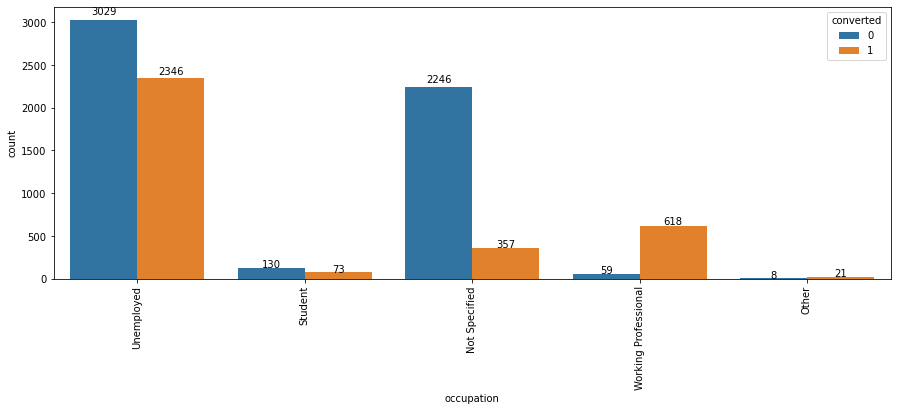

In [77]:
#occupation
univar_analysis('occupation')

`Observation:`
1. It is interesting to know that out of 5600, only 2441 converted.
2. From 706 Working Professionals, 647 converted.

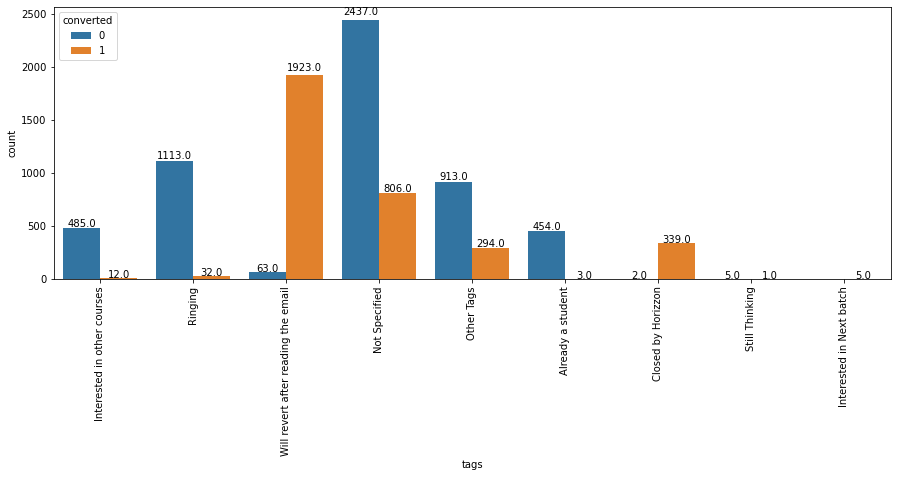

In [78]:
#tags
univar_analysis('tags')

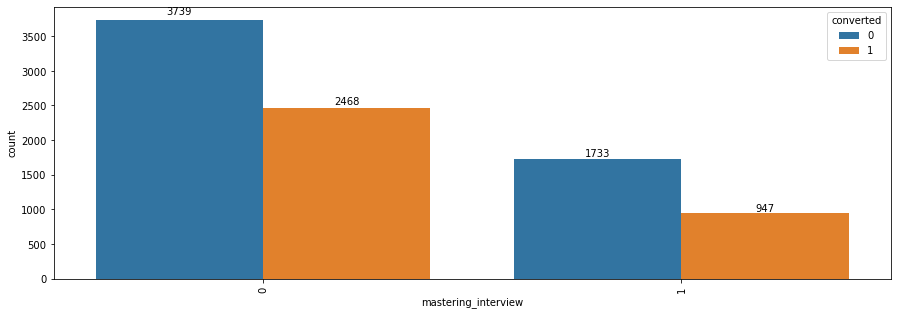

In [79]:
#mastering_interview
univar_analysis('mastering_interview')

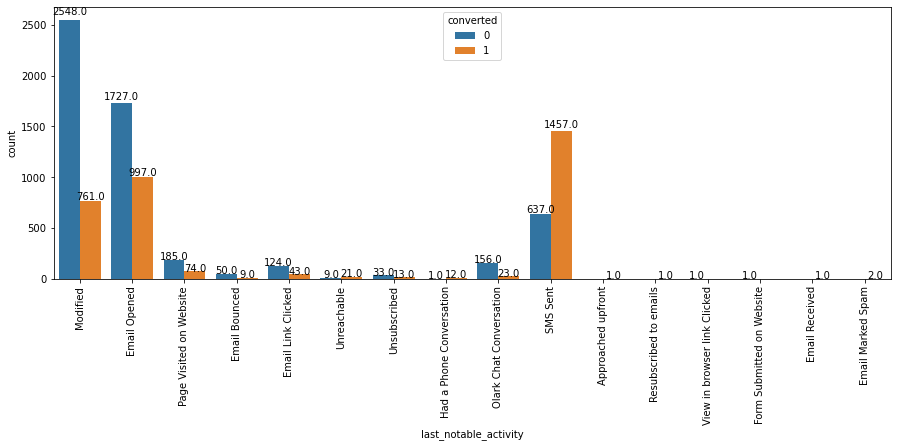

In [81]:
#last_notable_activity
univar_analysis('last_notable_activity')

`Observation:`
1. For individuals with Last Notable activity as SMS sent, 1508 people converted.

4.2 Numerical values

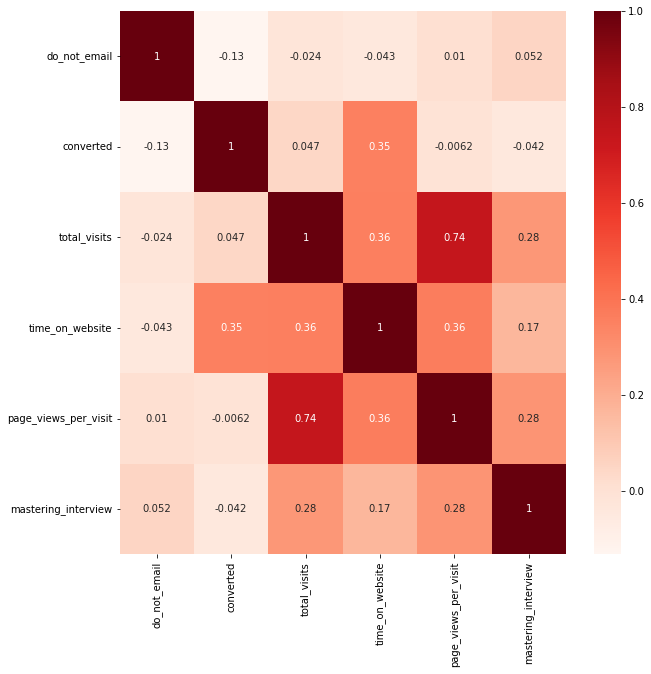

In [82]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, cmap= 'Reds')
plt.show()

`Observation:`
1. 

# 5. Dummy Variables

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lead_origin            8887 non-null   object 
 1   lead_source            8887 non-null   object 
 2   do_not_email           8887 non-null   int64  
 3   converted              8887 non-null   int64  
 4   total_visits           8887 non-null   float64
 5   time_on_website        8887 non-null   int64  
 6   page_views_per_visit   8887 non-null   float64
 7   last_activity          8887 non-null   object 
 8   specialization         8887 non-null   object 
 9   occupation             8887 non-null   object 
 10  tags                   8887 non-null   object 
 11  mastering_interview    8887 non-null   int64  
 12  last_notable_activity  8887 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 972.0+ KB


In [84]:
cat_cols = data.select_dtypes(include = 'object').columns
cat_cols

Index(['lead_origin', 'lead_source', 'last_activity', 'specialization',
       'occupation', 'tags', 'last_notable_activity'],
      dtype='object')

In [85]:
# lead_origin
Lead_Origin = pd.get_dummies(data['lead_origin'], prefix = 'Lead_Origin')
Lead_Origin = Lead_Origin.drop('Lead_Origin_Quick Add Form', axis = 1)
leads = pd.concat([data, Lead_Origin], axis = 1)